# Finding the Healthiest Pittsburgh Neighborhood to Live In

**By: Stella Bailey, Lukas Finn, and Hafsah Shahzad**

![safety](https://media.giphy.com/media/xT5LMBc1W9lVSheDnO/giphy.gif)

In order to find the 'healthiest' neighborhood in Pittsburgh, we looked at three different data sets. One of our data sets looks at the average age that people die in each neigbhorhood, another looks at the number of overdose deaths in each neighborhood, and our third data set looks at the amount of lead found in blood samples from specific school districts.

We decided that the best neighborhood should be the one with the highest average age at death, since they would live the longest there; as well as have the least amount of overdose deaths; and the lowest amount of blood levels. The second two metrics are more specific causes of death or 'unhealthiness' while the first is just showing the generalized data.

## Stella's Notebook: Average Age at Death

For my data set, I am analyzing the median age that people die in each Allegheny County neighborhood. Obviously, there are a lot of unforseen factors when determining when someone dies, but it is still a good metric to analyze the overall health and well-being of the population in each neighborhood.


Link: https://data.wprdc.org/dataset/median-age-death/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2

#### Importing everything:
*this does not need to be done again for the other group member's sections.*

In [1]:
import pandas as pd
import geopandas as gp
%matplotlib inline

#### Importing my data set:
*here I am importing my data as well as giving a visualization of what it looks like*

As you can see below, there are many subsections to the data as it breaks it down by race, however when I am analyzing my results, I only look at the last column which shows the median age. Also, you can see there is a column which shows the Total Deaths that are being recorded for this data set, this will be important later because the neighborhoods that have more data collected will obviously be more accurate representations.

In [3]:
# Importing my data set & showing the first 10 data points in the data set
data = pd.read_csv("avgDeathData.csv", index_col = "Neighborhood")
data.head(10)

,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
Neighborhood,,,,,,
South Shore,0,0.0,0,0.0,0,0.0
Chateau,0,0.0,2,NaN,2,NaN
North Shore,0,0.0,4,NaN,5,80.0
Allegheny West,3,NaN,4,NaN,8,65.0
Saint Clair,5,67.5,5,67.5,10,67.5
West End,5,76.7,9,78.0,14,77.5
Esplen,3,NaN,13,72.5,16,71.7
Arlington Heights,10,55.0,7,72.5,17,63.7
Strip District,7,76.7,12,70.0,19,72.5


To help visualize all of the data in my dataset, I have included a scatterplot below. From looking at the scatterplot, you can see that most of the median ages at death recorded fall somewhere around 70-80 years which is a good start; however, most of the data collected for each neighbhorhood has a sample size under about 300, though there are ones with more than 300 which may prove to be more reliable data.

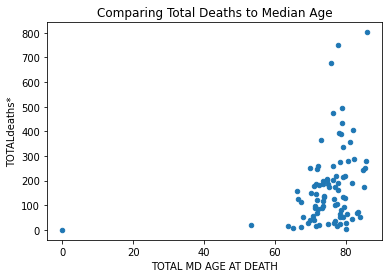

In [5]:
data.plot(kind='scatter', x = 'TOTAL MD AGE AT DEATH', y = 'TOTALdeaths*', title = 'Comparing Total Deaths to Median Age')

Next, I have also produced a map that shows the data better based on geographic location, though it is missing the actual neighbhorhood names. I would say that though there is not a clear pattern, there are pockets of neighbhorhoods where the data points are significantly higher, so the color is darker, than some other points. Also note that the greyed out sections are ones that had no data.

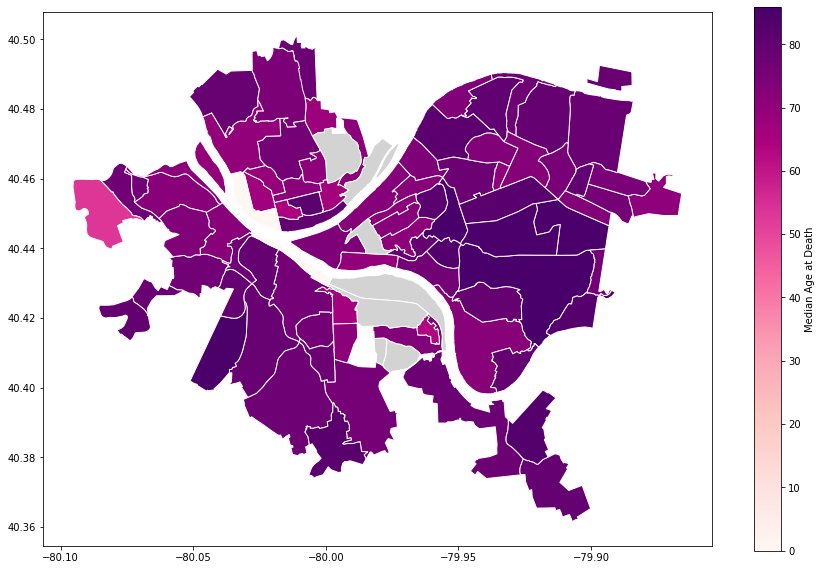

In [8]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")
numDeaths = data.groupby("Neighborhood").sum()['TOTAL MD AGE AT DEATH']
dataMap = neighborhoods.merge(numDeaths, how='left', left_on='hood', right_on='Neighborhood')
dataMap.plot(column='TOTAL MD AGE AT DEATH',
            cmap='RdPu',
            edgecolor='white',
            legend=True,
            legend_kwds={'label': "Median Age at Death"},
            figsize=(15,10),
            missing_kwds={'color': 'lightgrey'}
            )

In [18]:
print("Top Neighbhorhoods Based on the Age at Death:")
print()
print(numDeaths.sort_values(ascending=False).head(10))

print()
print()
print()
print("Neighborhoods With the Most Amount of Data Entries:")
print()
numEntries = data.groupby("Neighborhood").sum()['TOTALdeaths*']
print(numEntries.sort_values(ascending=False).head(10))


Top Neighbhorhoods Based on the Age at Death:

Neighborhood
Squirrel Hill South    85.9
North Oakland          85.6
Banksville             85.5
Point Breeze           85.1
Squirrel Hill North    85.0
Central Oakland        84.0
New Homestead          83.4
Swisshelm Park         83.1
Overbrook              82.2
Shadyside              82.1
Name: TOTAL MD AGE AT DEATH, dtype: float64



Neighborhoods With the Most Amount of Data Entries:

Neighborhood
Squirrel Hill South         802
Brookline                   750
Carrick                     678
Brighton Heights            496
Mount Washington            476
Beechview                   434
Shadyside                   406
Bloomfield                  394
Lincoln-Lemington-Belmar    389
East Liberty                364
Name: TOTALdeaths*, dtype: int64


#### In conclusion:
From my data set it can be seen that the neighborhoods listed above are the ones with the highest average ages at death, and I have also printed out the ones that had the most data entries. Clearly, Squirrel Hill South has the most entries as well as the highest average age, so that result should be the most reliable. Note that all of the other neighbhorhoods with higher median ages at death do not appear in the list of the neighborhoods with the most data entries, so those results might be less reliable.

## Lukas' Notebook: Overdose Deaths

For my analysis of the pittsburgh neighborhoods, I chose to analyze the amount of accidental overdoses. This dataset contains the incidents of overdose deaths in all of Allegheny county since 2007, collecting information on age, sex, race, and the drug(s) that caused the deaths. For my metric, the best neighborhood to live in is the one with the least amount of overdose deaths.

Link: https://data.wprdc.org/dataset/allegheny-county-fatal-accidental-overdoses

---
---
## Starting The Analysis
First, I imported everything that was necessary for the analysis and loaded in the dataset:

In [128]:
# importing everything necessary
import pandas as pd
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

# reading dataset
dose = pd.read_csv("overdosedata.tsv",sep='\t')

Next, I collected some basic statistics from the data:

In [137]:
# finding total overdose count
casecount = len(dose)

# finding average age
aveage = dose['age'].mean()

# finding count of victims based on sex
se = dose['sex'].value_counts()

# printing findings
print('\n''Number of cases:',casecount)
print('\n''Average age of victim:',aveage)
print('\n''Number of male (M) and female (F) victims:''\n')
print(se)


Number of cases: 5832

Average age of victim: 41.818930041152264

Number of male (M) and female (F) victims:

M    4004
F    1827
Name: sex, dtype: int64


### Findings after initial analysis: 
      - 5832 total cases
      
      - about 2/3 of victims are male
      
      - average age of victim is 42

---
## Analysis Of Substances
Next, I wanted to see which substances caused the most overdoses. After going through the data, I took the top 10 most lethal substances from the results and put it into a bar graph:


Top 10 causes of overdose counts:

('Diazepam', 281)
('Morphine', 368)
('Methadone', 443)
('Acetyl Fentanyl', 453)
('Oxycodone', 542)
('Alprazolam', 701)
('Alcohol', 1358)
('Cocaine', 2200)
('Heroin', 2390)
('Fentanyl', 2912)


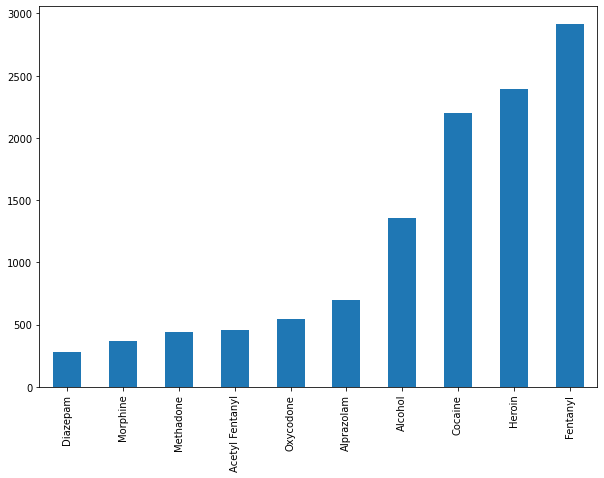

In [138]:
# creating a dictionary to store all substances
cause = dict()

# going through dataset to fill dictionary
for line in dose:
    causecol = dose['combined_od1']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od2']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od3']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od4']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od5']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od6']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od7']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od8']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1

# fixing values recorded (somehow all were multiplied by 19)
for reason, value in cause.items():
    cause[reason] = int(value/19)
    
# sorting data by turning it into a list, then back into a dictionary
causelist = sorted(cause.items(), key = lambda x:x[1])
cause = dict(causelist)

# printing findings
print('\n''Top 10 causes of overdose counts:''\n')
for x in causelist[158:168]:
    print (x)

# graphing findings by converting dictionary into dataframe
seframe = pd.DataFrame(cause.values(), index = cause.keys())
causeframe[158:168].plot.bar(legend = False, figsize=(10, 7))

### Findings after substance analysis: 
      - substances with the most associated deaths included Alcohol, Cocaine, Heroin, and Fentanyl
      
      - each of these substances had over 1000 deaths associated with their consumption

---
## Analysis By Neighborhood
The next step was analyzing the amount of overdoses by neighborhoods. Sadly, the dataset was sorted by zip code. This meant that everything had to be sorted manually.
I began by sorting the data by zip code:

In [139]:
# creating a dictionary of all zipcodes with overdoses
zipcount = dict()

# going through dataset to fil dictionary
for line in dose:
    zipcol = dose['incident_zip']
    for item in zipcol:
        if item in zipcount:
            zipcount[item] += 1
        else:
            zipcount[item] = 1

# fixing values recorded (somehow all were multiplied by 19)
for zipcode, value in zipcount.items():
    zipcount[zipcode] = int(value/19)

Next, I had to (very painfully) manually assign each zip code to each corresponding neighborhood, as there was no simple way to loop through all neighborhoods and automatically assign zip codes. Some neighborhoods were within multiple zip codes, which may cause slight miscalculations in overdose counts, but this was unavoidable from the data set. This was the process:

In [144]:
# creating a dictionary to hold all neighborhoods
neighborhoodscount = dict()

# manually assigning every neighborhood to their zipcode(s)
neighborhoodscount['Allegheny Center']= zipcount['15212']
neighborhoodscount['Allegheny West']= zipcount['15233'] + zipcount['15212']
neighborhoodscount['Allentown']= zipcount['15210']
neighborhoodscount['Arlington']= zipcount['15210']
neighborhoodscount['Arlington Heights']= zipcount['15210']
neighborhoodscount['Banksville']= zipcount['15220'] + zipcount['15216']
neighborhoodscount['Bedford Dwellings']= zipcount['15219']
neighborhoodscount['Beechview']= zipcount['15216']
neighborhoodscount['Beltzhoove']= zipcount['15210']
neighborhoodscount['Bloomfield']= zipcount['15224']
neighborhoodscount['Bluff']= zipcount['15219']
neighborhoodscount['Bon Air']= zipcount['15226'] + zipcount['15210']
neighborhoodscount['Brighton Heights']= zipcount['15212']
neighborhoodscount['Brookline']=  zipcount['15226']
neighborhoodscount['California-Kirkbride']= zipcount['15212'] +  zipcount['15233']
neighborhoodscount['Carrick']= zipcount['15210'] +  zipcount['15227']
neighborhoodscount['Central Business District']=  zipcount['15222']
neighborhoodscount['Central Lawrenceville']= zipcount['15201']
neighborhoodscount['Central Northside']= zipcount['15212']
neighborhoodscount['Central Oakland']= zipcount['15213']
neighborhoodscount['Chartiers']= zipcount['15204']
neighborhoodscount['Chateau']= zipcount['15233']
neighborhoodscount['Crafton Heights']= zipcount['15205']
neighborhoodscount['Crawford-Roberts']= zipcount['15219']
neighborhoodscount['Duquesne Heights']= zipcount['15211']
neighborhoodscount['East Allegheny']= zipcount['15212']
neighborhoodscount['East Carnegie']= zipcount['15206']
neighborhoodscount['East Hills']= zipcount['15221']
neighborhoodscount['East Liberty']= zipcount['15206']
neighborhoodscount['Elliott']= zipcount['15220']
neighborhoodscount['Esplen']= zipcount['15204']
neighborhoodscount['Fairywood']= zipcount['15205']
neighborhoodscount['Fineview']= zipcount['15212'] +  zipcount['15214']
neighborhoodscount['Friendship']= zipcount['15232']
neighborhoodscount['Garfield']= zipcount['15224']
neighborhoodscount['Glen Hazel']= zipcount['15207'] +  zipcount['15217']
neighborhoodscount['Greenfield']= zipcount['15207'] +  zipcount['15217']
neighborhoodscount['Hays']=  zipcount['15227'] + zipcount['15207'] + zipcount['15236']
neighborhoodscount['Hazelwood']= zipcount['15207']
neighborhoodscount['Highland Park']= zipcount['15206']
neighborhoodscount['Homewood North']= zipcount['15221'] + zipcount['15208']
neighborhoodscount['Homewood South']= zipcount['15221'] + zipcount['15208']
neighborhoodscount['Homewood West']= zipcount['15206'] +  zipcount['15208']
neighborhoodscount['Knoxville']= zipcount['15210']
neighborhoodscount['Larimer']= zipcount['15206']
neighborhoodscount['Lincoln–Lemington–Belmar']= zipcount['15206'] + zipcount['15147'] + zipcount['15215']
neighborhoodscount['Lincoln Place']= zipcount['15207']
neighborhoodscount['Lower Lawrenceville']= zipcount['15201']
neighborhoodscount['Manchester']= zipcount['15233']
neighborhoodscount['Marshall-Shadeland']= zipcount['15212'] + zipcount['15214']
neighborhoodscount['Middle Hill']= zipcount['15219']
neighborhoodscount['Morningside']= zipcount['15201'] + zipcount['15206']
neighborhoodscount['Mount Oliver']= zipcount['15210']
neighborhoodscount['Mount Washington']= zipcount['15211']
neighborhoodscount['New Homestead']=  zipcount['15207']
neighborhoodscount['North Oakland']= zipcount['15213']
neighborhoodscount['North Point Breeze']= zipcount['15208']
neighborhoodscount['North Shore']= zipcount['15212']
neighborhoodscount['Northview Heights']= zipcount['15212'] +  zipcount['15214']
neighborhoodscount['Oakwood']= zipcount['15205']
neighborhoodscount['Overbrook']= zipcount['15227'] + zipcount['15234'] + zipcount['15210']
neighborhoodscount['Perry North']= zipcount['15212'] + zipcount['15214']
neighborhoodscount['Perry South']= zipcount['15214']
neighborhoodscount['Point Breeze']= zipcount['15217'] + zipcount['15208']
neighborhoodscount['Polish Hill']= zipcount['15219']
neighborhoodscount['Regent Square']= zipcount['15218']
neighborhoodscount['Ridgemont']= zipcount['15220'] + zipcount['15216']
neighborhoodscount['Saint Clair']= zipcount['15210']
neighborhoodscount['Shadyside']= zipcount['15206'] + zipcount['15213'] +  zipcount['15232']
neighborhoodscount['Sheraden']=  zipcount['15204']
neighborhoodscount['South Oakland']= zipcount['15213']
neighborhoodscount['Southshore']= zipcount['15219']
neighborhoodscount['South Side Flats']= zipcount['15203']
neighborhoodscount['South Side Slopes']=  zipcount['15203'] + zipcount['15210']
neighborhoodscount['Spring Garden']= zipcount['15212']
neighborhoodscount['Spring Hill–City View']= zipcount['15212']
neighborhoodscount['Squirrel Hill North']= zipcount['15217']
neighborhoodscount['Squirrel Hill South']= zipcount['15217']
neighborhoodscount['Stanton Heights']= zipcount['15201'] + zipcount['15206']
neighborhoodscount['Strip District']= zipcount['15222']
neighborhoodscount['Summer Hill']= zipcount['15214']
neighborhoodscount['Swisshelm Park']= zipcount['15218']
neighborhoodscount['Terrace Village']= zipcount['15219']
neighborhoodscount['Troy Hill']= zipcount['15212']
neighborhoodscount['Upper Hill']= zipcount['15219']
neighborhoodscount['Upper Lawrenceville']= zipcount['15201']
neighborhoodscount['West End']= zipcount['15220']
neighborhoodscount['West Oakland']= zipcount['15213']
neighborhoodscount['Westwood']= zipcount['15205'] + zipcount['15220']
neighborhoodscount['Windgap']= zipcount['15204']

# sorting data by turning it into a list, then back into a dictionary
hoodlist = sorted(neighborhoodscount.items(), key = lambda x:x[1])
neighborhoodscount = dict(hoodlist)

Next, I went through the data, and pulled the top 10 neighborhoods with the least overdoses and top 10 neighborhoods with the most overdoses:

In [168]:
# printing findings
print('Top 10 neighborhoods with lowest overdose counts:''\n')
for x in hoodlist[0:10]:
    print (x)
print('\n''Top 10 neighborhoods with highest overdose counts:''\n')
for x in hoodlist[80:90]:
    print (x)

Top 10 neighborhoods with lowest overdose counts:

('Chateau', 14)
('Manchester', 14)
('Friendship', 15)
('Central Business District', 36)
('Strip District', 36)
('Squirrel Hill North', 39)
('Squirrel Hill South', 39)
('Central Oakland', 44)
('North Oakland', 44)
('South Oakland', 44)

Top 10 neighborhoods with highest overdose counts:

('Saint Clair', 295)
('Fineview', 309)
('Marshall-Shadeland', 309)
('Northview Heights', 309)
('Perry North', 309)
('Hays', 324)
('South Side Slopes', 371)
('Bon Air', 401)
('Carrick', 441)
('Overbrook', 499)


### Findings after neighborhood analysis: 
      - top 3 best neighborhoods are Chateau, Manchester, and Friendship
      
      - top 3 worst neighborhoods are Bon Air, Carrick, and Overbrook

---
## Graphing Neighborhood Analysis

Next, I graphed the data I found through my analysis:

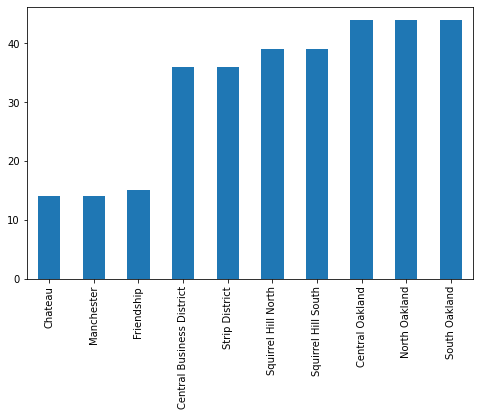

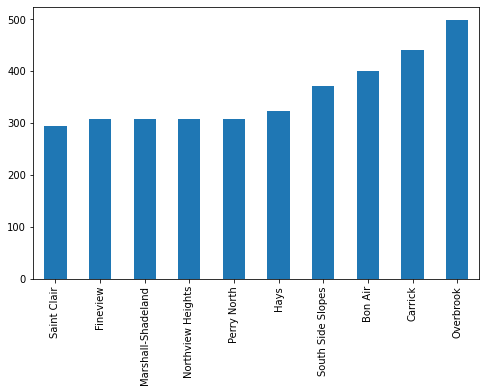

In [171]:
# graphing findings by converting dictionary into dataframe
hoodframe = pd.DataFrame(neighborhoodscount.values(), index = neighborhoodscount.keys())
hoodframe[0:10].plot.bar(legend = False, figsize=(8, 5))
hoodframe[80:90].plot.bar(legend = False, figsize=(8, 5))

The differences in these graphs may not look like much when seperate, but compare it to when all neighborhood values are shown:

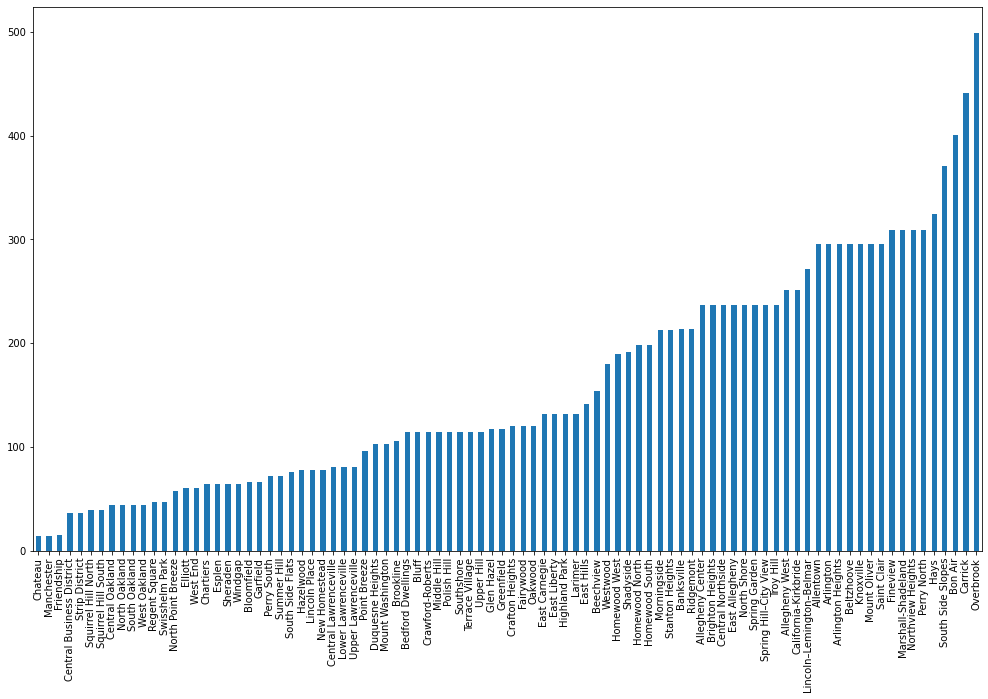

In [169]:
# graphing all of the neighborhoods
hoodframe[0:90].plot.bar(legend = False, figsize=(17, 10))

I then proceeeded to graph the following data on a map of all the pittsburgh neighborhoods:

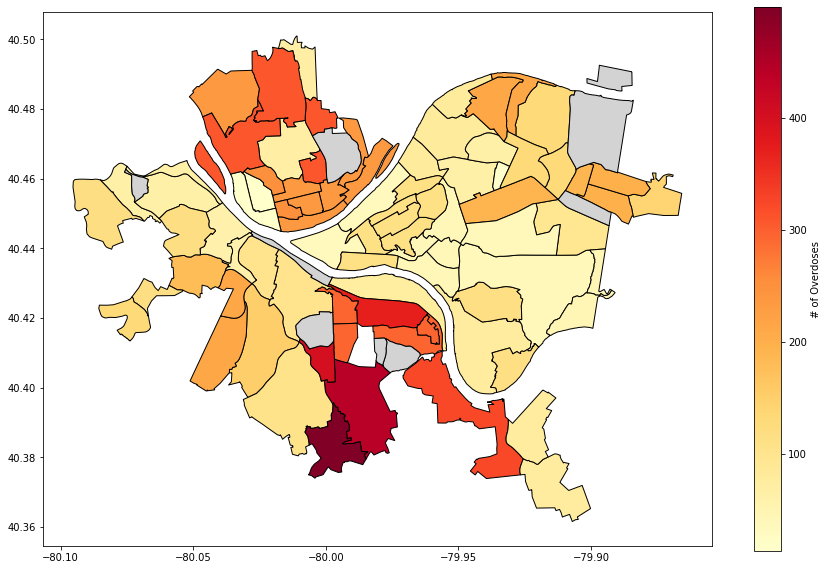

In [176]:
# reading file for mapping
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

# preparing data to be put into a dataframe
hoods = neighborhoodscount.keys()
doses = neighborhoodscount.values()
hoodframe2 = pd.DataFrame({'Neighborhood': hoods, 'Overdoses': doses})

# merging dataframes
overmap = neighborhoods.merge(hoodframe2, how='left', left_on='hood', right_on='Neighborhood')

#graphing the map
overmap.plot(column='Overdoses', cmap='YlOrRd', edgecolor="black",
legend=True, legend_kwds={'label': "# of Overdoses"}, figsize=(15, 10),
missing_kwds={"color": "lightgrey"})

 This is a nice and tidy way of displaying the data, and paints a clear picture of where overdoses are more concentrated and where there are little to no overdoses.

---
### Conclusion
After a thorough analysis, the best neighborhood in Pittsburgh to live in (based off of least overdose deaths) is Chateau or Manchester, both with an overdose count of only 14. Friendship was at a close second with an overdose count of 15, but out of all of Pittsburgh, these two neighborhoods are the best to live in.

# Group Conclusion
*Note: Due to technical issues, Hafsah's information could not be incorporated into our report, so we will only be using data from the overdose rates and the average age at death.*

Between our two data sets, we found a lot of similarities in our top 10, specifically: Squirrel Hill North, Squirrel Hill South, Central Oakland, and North Oakland. Squirrel Hill South held the number one spot in the average age at death, and it is a trust worthy data point as it had over 800 entries, and it also tied for fourth in the lowest number of overdoses per neighborhood. Because of all of this, we have decided that Squirrel Hill South is the best neighborhood to live in, in Pittsburgh.